# Data Exploration and Analysis
In this notebook I used some data cleaning along with data analysis

In [1]:
# importing required libraries
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# loading the scraped data
df = pd.read_csv('data_final.csv')
print('Number of posts in data: {}'.format(len(df)))

Number of posts in data: 17653


In [3]:
df.head()

,PostUploadTime,Headline,Flair,Rating,UserName,UserPostKarma,UserCommentKarma,Id,PostSource,NumComments,Comments,PostBody
0,1.587106e+09,Man Arrested For Allegedly Spitting On Manipur...,Non-Political,111,ReallyRedditLover,1008.0,116.0,g2ph3l,https://www.ndtv.com/mumbai-news/man-arrested-...,7,">The accused was identified as **Amir Khan** ,...",NaN
1,1.587106e+09,Bought air tickets during lockdown? Full refun...,Coronavirus,8,ReallyRedditLover,1008.0,116.0,g2pg1d,https://timesofindia.indiatimes.com/business/i...,2,"So, If I booked the ticket on 21st for 26th Ma...",NaN
2,1.587105e+09,Bollywood Nazis: A Tale of Two Sisters,Politics,19,iSalaamU,32174.0,14938.0,g2pd5o,https://www.reddit.com/r/india/comments/g2pd5o...,7,Woah so permanent ban right ? Not temporary .....,"Yesterday, Twitter permanently suspended the a..."
3,1.587105e+09,"On this occasion of Rongāli bihu, I'd love to ...",Non-Political,10,deboo117,8370.0,2700.0,g2p97t,https://open.spotify.com/playlist/21uBCM64wmKV...,0,NaN,NaN
4,1.587104e+09,A Tweet Asking For Muslims And Journalists To ...,Coronavirus,1,NaN,NaN,NaN,g2ovv5,https://www.buzzfeednews.com/article/pranavdix...,1,NaN,[deleted]


***-> Let's see what does the data contain***
1. ```PostUploadTime``` - time stamp of the moment when the post is uploaded on reddit
2. ```Headline``` - title of the post
3. ```Flair``` - Flair category of the post
4. ```Rating``` - rating on the post
5. ```UserName``` - user name of the author of the post
6. ```UserCommentKarma``` - It is a author's comment rating given based on comment activities done by the user
7. ```UserPostKarma``` - Author's post rating, similar to comment karma
8. ```Id``` - Every post has an unique id
9. ```PostSource``` - url of the post
10. ```NumComments``` - number of comments on the post
11. ```PostBody``` - text body of the post
12. ```Comments``` - top 10 comments on the post(concatenated)

In [4]:
# some detail about categorical(numerical) features
df.describe()

,PostUploadTime,Rating,UserPostKarma,UserCommentKarma,NumComments
count,1.765300e+04,17653.000000,1.158700e+04,11587.000000,17653.000000
mean,1.582924e+09,51.721011,2.445493e+04,8012.131268,7.284484
std,3.811376e+06,244.311097,9.759770e+04,18214.542712,26.116591
min,1.573901e+09,0.000000,1.000000e+00,-100.000000,0.000000
25%,1.580428e+09,1.000000,2.560000e+02,67.500000,0.000000
50%,1.584195e+09,3.000000,3.901000e+03,1170.000000,0.000000
75%,1.586018e+09,26.000000,1.964600e+04,6679.000000,5.000000
max,1.587106e+09,12490.000000,3.380088e+06,296788.000000,1117.000000


From above description we can see that the numComments does not have a significnt values, almost 50% of the values are near to zero.(50% of the data has zero comments)

In [5]:
# checking datatyope and non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17653 entries, 0 to 17652
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PostUploadTime    17653 non-null  float64
 1   Headline          17653 non-null  object 
 2   Flair             17653 non-null  object 
 3   Rating            17653 non-null  int64  
 4   UserName          14307 non-null  object 
 5   UserPostKarma     11587 non-null  float64
 6   UserCommentKarma  11587 non-null  float64
 7   Id                17653 non-null  object 
 8   PostSource        17653 non-null  object 
 9   NumComments       17653 non-null  int64  
 10  Comments          8037 non-null   object 
 11  PostBody          5928 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.6+ MB


`Categorical Features` includes Flair, UserName, UserCommentaKarma, UserPostKarma, Rating, numComments<br>
`Continueous Variables` includes Headline, Comments, PostBody.<br>
In a certain way ***PostSource*** is not of any use in data exploration so this can be removed.

In [6]:
df.drop('PostSource', inplace = True, axis = 1)
df.head(4)

,PostUploadTime,Headline,Flair,Rating,UserName,UserPostKarma,UserCommentKarma,Id,NumComments,Comments,PostBody
0,1.587106e+09,Man Arrested For Allegedly Spitting On Manipur...,Non-Political,111,ReallyRedditLover,1008.0,116.0,g2ph3l,7,">The accused was identified as **Amir Khan** ,...",NaN
1,1.587106e+09,Bought air tickets during lockdown? Full refun...,Coronavirus,8,ReallyRedditLover,1008.0,116.0,g2pg1d,2,"So, If I booked the ticket on 21st for 26th Ma...",NaN
2,1.587105e+09,Bollywood Nazis: A Tale of Two Sisters,Politics,19,iSalaamU,32174.0,14938.0,g2pd5o,7,Woah so permanent ban right ? Not temporary .....,"Yesterday, Twitter permanently suspended the a..."
3,1.587105e+09,"On this occasion of Rongāli bihu, I'd love to ...",Non-Political,10,deboo117,8370.0,2700.0,g2p97t,0,NaN,NaN


As the data is extracted using pushshift api, so it gave the data sorted on base of time of submiossion. Now the complete date and time is no use in text classification, instead I am going to just use only month of submission, bcoz the complete data is between 12 months so no effect of year values.

In [7]:
# unique flairs present in the data
df['Flair'].unique()

array(['Non-Political', 'Coronavirus', 'Politics', 'Policy/Economy',
       'Food', 'Science/Technology', 'Business/Finance', 'Photography',
       'Sports'], dtype=object)

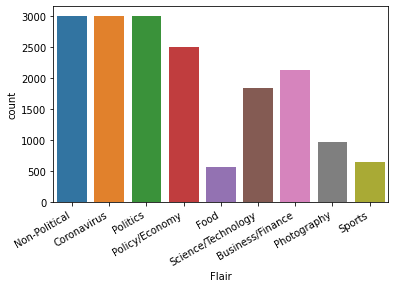

In [8]:
# plotting the amount of posts based on the flair class in the data
fig = plt.figure()
sns.countplot(x='Flair', data = df)
fig.autofmt_xdate()

Data on basis of flair class is not much imbalanced. As for the food and sports category the data insufficiency might be a problem.<br>
It is obvious that the non-political, Politics and Coronovirus flaired posts are highly abundant.<br>
Although many other flairs are avialable on the subreddit but i have picked only a few based on quantity they are present.

In [9]:
# checking the number of removed and deleted value in every feature in the data
for head in df:
  print('Number of nan Values in {}: {}'.format(head, df[head].isnull().sum()))
  print('Number of [removed] Values: {}'.format((df[head]=='[removed]').sum()))
  print('Number of [deleted] Values: {}'.format((df[head]=='[deleted]').sum()))
  print("")

Number of nan Values in PostUploadTime: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Headline: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Flair: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Rating: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserName: 3346
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserPostKarma: 6066
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserCommentKarma: 6066
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Id: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in NumComments: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Comments: 9616
Number of [removed] Values: 15
Number of [deleted] Values: 41

Numbe

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


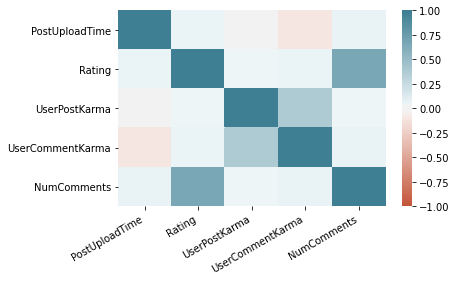

In [10]:
# (pearson's corr)correlation matrix.
corr = df.corr()
fig = plt.figure()
ax = sns.heatmap(corr, 
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20, 220, n=200))
fig.autofmt_xdate()

- There is not much correlation between categorical numerical(categorical) variables<br>
- Although Userpostkarma and UserCommentKarma have correlation of around 0.5.<br>
- So instead of having two seperate columns we can merge them, this would reduce the causes of dependency and also reduces the complexity of data

In [12]:
# adding a new feature UserKarma := UserPostKarma + UserCommentKarma
# as the UserCommentkarma and UserPostKarma contains nan values i will consider them as 0 value.
from math import isnan
df['UserCommentKarma'] =  df['UserCommentKarma'].fillna(0)
df['UserPostKarma'] =  df['UserPostKarma'].fillna(0)
df['UserKarma'] = df['UserCommentKarma']+ df['UserPostKarma']
df.UserKarma

0         1124.0
1         1124.0
2        47112.0
3        11070.0
4            0.0
          ...   
17648        0.0
17649        0.0
17650    43558.0
17651    43558.0
17652      345.0
Name: UserKarma, Length: 17653, dtype: float64

In [13]:
# checking the number of removed and deleted value in every feature in the data
for head in df:
  print('Number of nan Values in {}: {}'.format(head, df[head].isnull().sum()))
  print('Number of [removed] Values: {}'.format((df[head]=='[removed]').sum()))
  print('Number of [deleted] Values: {}'.format((df[head]=='[deleted]').sum()))
  print("")

Number of nan Values in PostUploadTime: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Headline: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Flair: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Rating: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserName: 3346
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserPostKarma: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in UserCommentKarma: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Id: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in NumComments: 0
Number of [removed] Values: 0
Number of [deleted] Values: 0

Number of nan Values in Comments: 9616
Number of [removed] Values: 15
Number of [deleted] Values: 41

Number of n

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [14]:
# replacing the nan values in the postBody and comment to nullstring.
df['PostBody'] = df['PostBody'].fillna("")
df['Comments'] = df['Comments'].fillna("")

# replacing the '[deleted]' and '[removed]' with null string from postbody and comments section
df['PostBody'] = df['PostBody'].replace('[removed]', '')
df['PostBody'] = df['PostBody'].replace('[deleted]', '')
df['Comments'] = df['Comments'].replace('[removed]', '')
df['Comments'] = df['Comments'].replace('[deleted]', '')

# checking the number of removed and deleted value in Comment and PostBody features
for head in [df.Comments, df.PostBody]:
  print("Number of '[removed]' Values: {}".format((head=='[removed]').sum()))
  print("Number of '[deleted]' Values: {}".format((head=='[deleted]').sum()))
  print("")

Number of '[removed]' Values: 0
Number of '[deleted]' Values: 0

Number of '[removed]' Values: 0
Number of '[deleted]' Values: 0



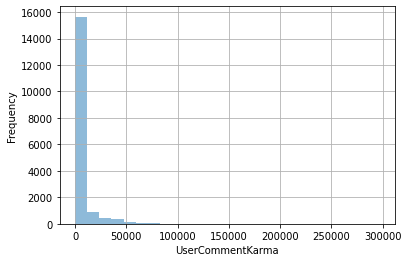

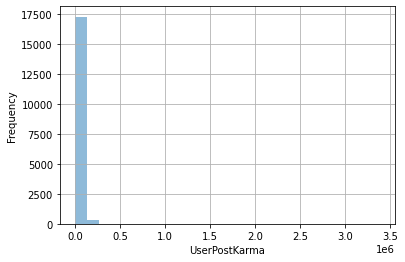

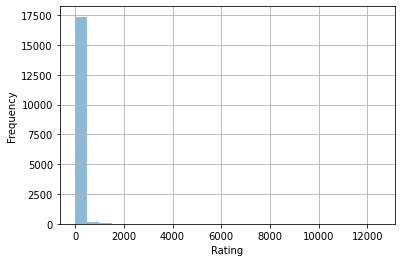

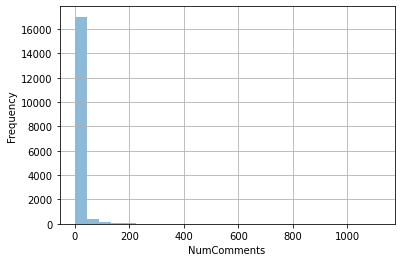

----Skewness----
PostUploadTime      -0.922937
Rating              19.572519
UserPostKarma       24.109006
UserCommentKarma     6.635881
NumComments         13.477360
UserKarma           22.398314
dtype: float64


In [15]:
# checking for skewed data
for feature in ['UserCommentKarma', 'UserPostKarma', 'Rating', 'NumComments']:
  df[feature].plot.hist(alpha=0.5, bins=25, grid = True)
  plt.xlabel(feature)
  plt.show()

print('----Skewness----')
print(df.skew(axis = 0, skipna = True))

In [0]:
df['UserName'].value_counts()[:50]

iali307               173
sudden_dust           133
harddisc              114
cncrndctzn2           111
Dumma1729             102
silentr3b31            92
hipporama              79
gogajabbi              76
AlternativeDrop6       76
pramodc84              76
india_ko_vanakkam      75
satyasys               74
BrandBrahma            74
GL4389                 72
ShabbitRabbit          72
aviakki1               71
vv4life                68
pkmcreation            67
Ku_hu                  66
Neglectedsince1994     65
InternetFreedomIn      64
Shellynoire            63
yashikamaroon          63
iamfawad               61
Hanuwoman              60
dlisfyn                59
thelielmao             55
imwithinme             52
ppatra                 51
GlobalCitizen12345     51
Budget-Independent     50
Gadgetbridge           49
BabaGyaanchod          48
hammyhammad            48
policychettan          47
MayaSmithQms           47
rana1500               46
HornOK                 46
Fabulous-Ric

In [0]:
# appending all the text features in a post into one single column 'text'
data = pd.DataFrame(columns=['text', 'flair'])
data['text'] = df['Headline'].map(str) + df['PostBody'].map(str) + df['Comments'].map(str)
data['flair'] = df['Flair'].map(str)
data.head()

,text,flair
0,Man Arrested For Allegedly Spitting On Manipur...,Non-Political
1,Bought air tickets during lockdown? Full refun...,Coronavirus
2,Bollywood Nazis: A Tale of Two SistersYesterda...,Politics
3,"On this occasion of Rongāli bihu, I'd love to ...",Non-Political
4,A Tweet Asking For Muslims And Journalists To ...,Coronavirus
